# 8. Neural Networks and Deep Learning

This week, we will learn about neural networks and how to build a model for clothing classifier.

## 8.1 Fashion classification

Get the Dataset:
- Full (~322MB): https://github.com/alexeygrigorev/clothing-dataset
- Subset (~212MB): https://github.com/alexeygrigorev/clothing-dataset-small 

Links:
- https://cs231n.github.io/

In [2]:
!git clone git@github.com:alexeygrigorev/clothing-dataset.git
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

fatal: destination path 'clothing-dataset' already exists and is not an empty directory.


fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


## 8.2 Tensorflow and Keras

- Installing Tensorflow
- Loading Images

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [4]:
# !pip install tensorflow[and-cuda]

In [5]:
import tensorflow as tf
from tensorflow import keras

print("GPUs: ", len(tf.config.list_physical_devices('GPU')))

2023-11-11 14:16:11.230068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 14:16:11.230108: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 14:16:11.231910: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 14:16:11.445128: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPUs:  1


2023-11-11 14:16:13.794009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 14:16:13.839855: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 14:16:13.840469: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

**Loading image-data**

In [6]:
# Works for TensorFlow >= 2.0
from tensorflow.keras.preprocessing.image import load_img

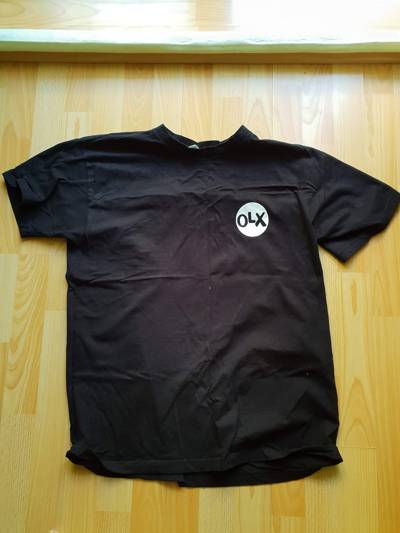

In [7]:
path = "./clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
full_path = f"{path}/{name}"
load_img(full_path)

Resizing of images is often required, since many Neural Networks require inputs of a certain size:

In [8]:
img = load_img(full_path, target_size=(299, 299))

In [9]:
# The loaded and resized image is in PIL-format
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7EFE9AC28940>


The Image is 3-channel RGB-image (red, green, blue)

In [10]:
print(img.size, img.mode)

(299, 299) RGB


Converting PIL-Image to numpy array

In [11]:
x = np.array(img)
print(x.shape)
x # each row is a pixel with (R,G,B) color values

(299, 299, 3)


array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

## 8.3 Pre-trained Convoluational Neural Networks (CNNs)

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [12]:
# Good tradeoff between speed and size of model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [14]:
size = (299, 299, 3)
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2023-11-09 13:48:36.919659: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 13:48:36.919912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 13:48:36.920011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Testing the pre-trained neural network with the shirt:

In [15]:
X = x[None, ...]
X = preprocess_input(X)
pred = model.predict(X) # requires pre-processing to work properly

2023-11-09 13:48:38.651801: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


1/1 [==============================] - 2s 2s/step


In [16]:
print("Imagnet-scores:", pred.shape) # Imagenet has 1000 classes
top_scores = decode_predictions(pred)[0]
print(f"Top-{len(top_scores)} Scores:")
for score in top_scores:
    print(score)

Imagnet-scores: (1, 1000)
Top-5 Scores:
('n03595614', 'jersey', 0.6792454)
('n02916936', 'bulletproof_vest', 0.039600216)
('n04370456', 'sweatshirt', 0.035299513)
('n03710637', 'maillot', 0.010884131)
('n04525038', 'velvet', 0.0018057576)


## 8.4 Convolutional Neural Networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

See [README](../README.md#04-conv-neural-nets) for more information.

## 8.5 Transfer Learning

- Reading data with `ImageDataGenerator`
- Train `Xception` on smaller images $150\times150$

(Better to run it with a GPU)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

Setting up training-data for fine-tuning with the following parameter:
- `target_size`: Size of input images
- `batch_size`: How many images are processed at once

In [15]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=True
)

Found 3068 images belonging to 10 classes.


In [16]:
# A helper function for visualization
def invDict(d):
    return {v: k for k, v in d.items()}

# Looking into the dataset
train_ds.class_indices
# Class-names were inferred from the folder-stucture

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [17]:
# Getting a sample from the dataset
X, y = next(train_ds)

Looking into how the data is represented / encoded and what it means:

In [18]:
print(X.shape, y.shape)
print(y[:5]) # one-hot encoding

for i in range(5):
    y_i = y[i].argmax()
    cls_i = invDict(train_ds.class_indices)[y_i]
    print(f"y[{i}] = {y[i]} -> {y_i} -> {cls_i}")

(32, 150, 150, 3) (32, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
y[0] = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] -> 6 -> shoes
y[1] = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] -> 2 -> longsleeve
y[2] = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -> 9 -> t-shirt
y[3] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] -> 5 -> shirt
y[4] = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] -> 4 -> pants


Creating the Validation-Dataset:

In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation/",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False # just for eval. -> no shuffling needed
)

Found 341 images belonging to 10 classes.


**Loading the `Base`-model**
- `Base- of Bottom-model`: the CNN
- `Top-model`: the dense-layer part of the overall model

In [24]:
base_model = Xception(
    weights="imagenet", 
    include_top=False, # excluding dense-part
    input_shape=(150, 150, 3)
)

# fix / freeze the base-model
base_model.trainable = False

### Creating and testing a Keras Model

![transfer3](../imgs/transfer_3.jpg)

**Functional-Style of building Keras-Networks:**

In [23]:
# `inputs` get passed to froten CNN feature-extractor
inputs = keras.Input(shape=(150, 150, 3))

# Output of the CNN
base = base_model(inputs, training=False)

# Applying average pooling to obtain 1D feature-vectors
vectors = keras.layers.GlobalAveragePooling2D()(base)

# `outputs`: feature-vectures after applying dense-layers
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)    

In [24]:
# X -> inputs, preds -> outputs
preds = model.predict(X)

1/1 [==============================] - 1s 1s/step


2023-11-08 14:29:21.619985: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.88GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


In [25]:
preds[0] # Just some random numbers -> Dense-Layers need training

array([ 0.06296419,  0.6311612 , -0.23855776, -0.22190998,  0.74706185,
        0.1937729 , -1.0983284 ,  0.06107873, -0.4328707 , -0.5565769 ],
      dtype=float32)

**Training weights of the dense-layer part of the overall model**

- `Logits`: un-normalized "raw" scores that are the output of the dense-layer part of the overall model

In [26]:
# Defining optimizer
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Defining loss function for training
loss = keras.losses.CategoricalCrossentropy(
    from_logits=True
) # for multi-class problems

model.compile(
    optimizer=optimizer, 
    loss=loss,
    metrics=["accuracy"]
)

An `epoch` in training is the nr. of times the training-algorithm iterates over the whole training-dataset.

In [27]:
# The training itself
n_epochs = 10
history = model.fit(
    train_ds, 
    epochs=n_epochs, 
    validation_data=val_ds
)

Epoch 1/10
 1/96 [..............................] - ETA: 3:10 - loss: 2.6136 - accuracy: 0.0312

2023-11-08 14:29:23.640928: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f5fc802c0a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-08 14:29:23.640947: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-11-08 14:29:23.648528: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-08 14:29:23.731896: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


79/96 [=======================>......] - ETA: 1s - loss: 1.3118 - accuracy: 0.6549

2023-11-08 14:29:30.514588: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.87GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 [==============================] - 12s 108ms/step - loss: 1.2721 - accuracy: 0.6633 - val_loss: 1.1974 - val_accuracy: 0.7595
Epoch 2/10
96/96 [==============================] - 8s 84ms/step - loss: 0.5954 - accuracy: 0.8204 - val_loss: 0.9940 - val_accuracy: 0.7713
Epoch 3/10
96/96 [==============================] - 8s 83ms/step - loss: 0.3519 - accuracy: 0.8713 - val_loss: 0.7902 - val_accuracy: 0.8123
Epoch 4/10
96/96 [==============================] - 8s 84ms/step - loss: 0.2152 - accuracy: 0.9228 - val_loss: 0.7741 - val_accuracy: 0.8387
Epoch 5/10
96/96 [==============================] - 8s 84ms/step - loss: 0.1720 - accuracy: 0.9394 - val_loss: 0.8755 - val_accuracy: 0.7918
Epoch 6/10
96/96 [==============================] - 8s 83ms/step - loss: 0.1160 - accuracy: 0.9622 - val_loss: 0.8587 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 8s 85ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 1.0029 - val_accuracy: 0.8006
Epoch 8/10
96/96 [====

**Lets learn from `history`!**

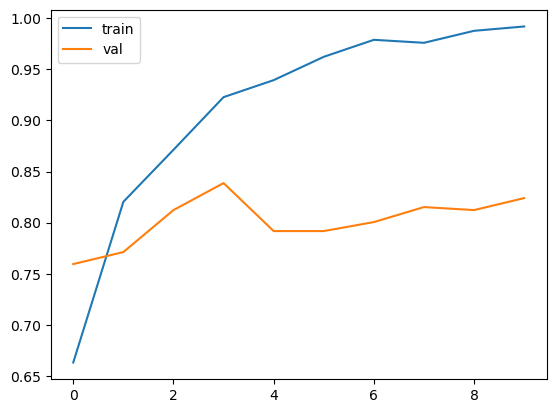

In [28]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

**Observations:**
- The accuracy of the training data reaches $\approx 1$
- The accuracy of the validation data oscillates around $0.8$
- The model starts to overfit after 2 iterations

What can be done to get a better consistency between train and validation accuracy?
- Fine tune hyper parameters like the learning rate!

## 8.6 Adjust the learning rate

- What's the learning rate
- Trying different values

In [20]:
def make_model(learning_rate=0.1):

    base_model = Xception(
        weights="imagenet", 
        include_top=False, # excluding dense-part
        input_shape=(150, 150, 3)
    )

    # fix / freeze the base-model
    base_model.trainable = False

    #######################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [30]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"lr = {lr}")
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print("\n\n")

lr = 0.0001


Epoch 1/10
96/96 [==============================] - 11s 90ms/step - loss: 1.8955 - accuracy: 0.3706 - val_loss: 1.6341 - val_accuracy: 0.4809
Epoch 2/10
96/96 [==============================] - 8s 85ms/step - loss: 1.3685 - accuracy: 0.5642 - val_loss: 1.2766 - val_accuracy: 0.6070
Epoch 3/10
96/96 [==============================] - 8s 85ms/step - loss: 1.1274 - accuracy: 0.6392 - val_loss: 1.0933 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 8s 84ms/step - loss: 0.9902 - accuracy: 0.6861 - val_loss: 0.9823 - val_accuracy: 0.6950
Epoch 5/10
96/96 [==============================] - 8s 86ms/step - loss: 0.8976 - accuracy: 0.7145 - val_loss: 0.9110 - val_accuracy: 0.7155
Epoch 6/10
96/96 [==============================] - 8s 85ms/step - loss: 0.8318 - accuracy: 0.7285 - val_loss: 0.8509 - val_accuracy: 0.7361
Epoch 7/10
96/96 [==============================] - 8s 84ms/step - loss: 0.7810 - accuracy: 0.7451 - val_loss: 0.8121 - val_accuracy: 0.7537
Epoch 8/10
9

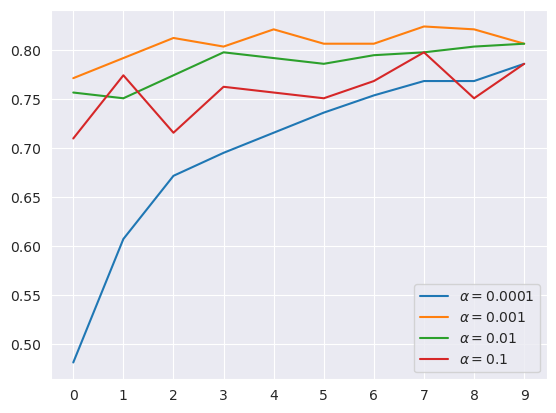

In [37]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=r"$\alpha = $" + str(lr))
plt.xticks(np.arange(10))
plt.legend()
plt.savefig("../imgs/learning_rates.png")
plt.show()

- Best learning rate here is $\alpha=0.001$

In [40]:
del scores[0.1]
del scores[0.0001]

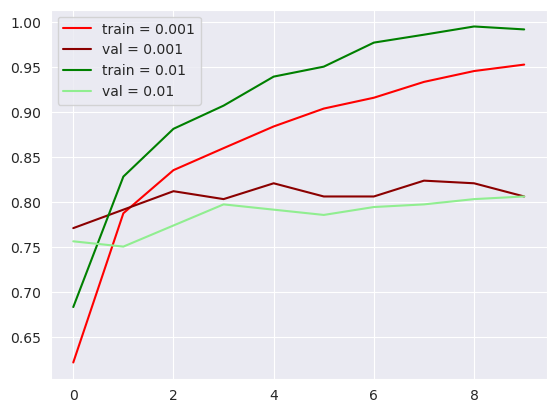

In [45]:
# Comparing Train- and Validation-Accuracy (only 0.01, 0.001)a

- $\alpha=0.001$ has the smaller gap between train- and validation-accuracy, thus generalizing reasonably good.

## 8.7 Checkpointing

- Saving the model only
- Training the model with callbacks

### Saving the model only

In [31]:
# Simply saving the model with a given name in specified format
model.save_weights("model_v1.h5", save_format="h5")
%ls *.h5

model_v1.h5


### Training the model with callbacks

Callback that saves a model-checkpoint when `val_accuracy` is maximized (bigger than prev. max-value of specified metric):

In [34]:
ckpt_name = "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5".format(epoch=12, val_accuracy=0.82423423)
print(ckpt_name)


checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,    # only saves when model / monitored metric improves
    monitor="val_accuracy", # metric to monitor
    mode="max"              # what should be done with metric
)

xception_v1_12_0.824.h5


Training the model while utilizing the callback-function:

In [35]:
lr = 0.001
model = make_model(learning_rate=lr)
history = model.fit(train_ds, 
                    epochs=10, 
                    validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0847 - accuracy: 0.6408

/home/user22/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 11s 95ms/step - loss: 1.0847 - accuracy: 0.6408 - val_loss: 0.7256 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 8s 87ms/step - loss: 0.6318 - accuracy: 0.7846 - val_loss: 0.6522 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 8s 86ms/step - loss: 0.5119 - accuracy: 0.8227 - val_loss: 0.6159 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 8s 85ms/step - loss: 0.4311 - accuracy: 0.8559 - val_loss: 0.5948 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 8s 85ms/step - loss: 0.3714 - accuracy: 0.8866 - val_loss: 0.5570 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 8s 87ms/step - loss: 0.3359 - accuracy: 0.8990 - val_loss: 0.5535 - val_accuracy: 0.8182
Epoch 7/10
96/96 [==============================] - 8s 86ms/step - loss: 0.2930 - accuracy: 0.9169 - val_loss: 0.5514 - val_accuracy: 0.8152
Epoch 8/10
96/96 [=====

## 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

### Adding one inner dense layer

In [21]:
def make_model(learning_rate=0.1, size_inner=100):

    base_model = Xception(
        weights="imagenet", 
        include_top=False, # excluding dense-part
        input_shape=(150, 150, 3)
    )

    # fix / freeze the base-model
    base_model.trainable = False

    #######################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation="relu")(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #######################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(
        optimizer=optimizer, 
        loss=loss,
        metrics=["accuracy"]
    )

    return model

### Experimenting with different sizes of inner layer

In [22]:
lr = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"lr = {lr}")
    model = make_model(learning_rate=lr, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print("\n\n")

lr = 0.001


2023-11-11 14:17:32.080472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 14:17:32.080677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 14:17:32.080780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/10


2023-11-11 14:17:35.460166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-11 14:17:36.734998: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.88GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-11-11 14:17:36.769448: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efdec04f2d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-11 14:17:36.769469: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-11-11 14:17:36.777208: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-11 14:17:36.870694: I ./tensorfl

80/96 [========================>.....] - ETA: 1s - loss: 1.4935 - accuracy: 0.5086

2023-11-11 14:17:43.589585: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.87GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 [==============================] - 13s 105ms/step - loss: 1.4257 - accuracy: 0.5313 - val_loss: 0.9687 - val_accuracy: 0.6804
Epoch 2/10
96/96 [==============================] - 8s 85ms/step - loss: 0.8138 - accuracy: 0.7386 - val_loss: 0.7622 - val_accuracy: 0.7595
Epoch 3/10
96/96 [==============================] - 8s 86ms/step - loss: 0.6202 - accuracy: 0.7907 - val_loss: 0.6808 - val_accuracy: 0.7771
Epoch 4/10
96/96 [==============================] - 8s 85ms/step - loss: 0.5191 - accuracy: 0.8338 - val_loss: 0.6330 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 8s 84ms/step - loss: 0.4403 - accuracy: 0.8615 - val_loss: 0.6450 - val_accuracy: 0.7889
Epoch 6/10
96/96 [==============================] - 8s 86ms/step - loss: 0.3747 - accuracy: 0.8875 - val_loss: 0.6190 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 8s 83ms/step - loss: 0.3317 - accuracy: 0.8986 - val_loss: 0.5832 - val_accuracy: 0.8065
Epoch 8/10
96/96 [====

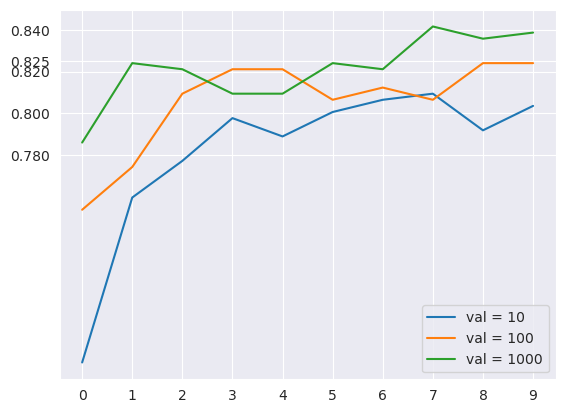

In [29]:
# Comparing Train- and Validation-Accuracy (only 0.01, 0.001)
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=f"val = {size}")
plt.legend()
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.84])
plt.show()

Adding an extra layer led to some improvement (`val_accuracy`$\approx0.84$) compared to the previous model (`val_accuracy`$\approx0.8$) without the extra layer. The increase of depth is reasonable here, however you should not increase the depth of a neural network too much to avoid unneeded complexity.

## 8.9 Regularization and dropout

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

## 8.10 Data augmentation

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

## 8.11 Trainingm a larger model

- Train a $299\times299$ model

## 8.12 Using the model

- Loading the model
- Evaluating the model
- Getting predictions

## 8.13 Summary

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scrath, we can use transfer learning and re-use already trained convolutional layers